# KNN Regresion:

In [52]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [53]:
data_set =pd.read_csv("Salary Data.csv")
data_set.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [54]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [55]:
data_set[data_set.duplicated()].shape

(50, 6)

In [56]:
data_set1=data_set.drop_duplicates()


In [57]:
data_set1.isnull().sum()

Age                    1
Gender                 1
Education Level        1
Job Title              1
Years of Experience    1
Salary                 1
dtype: int64

In [58]:
data_set1.dropna()
data_set1.fillna(data_set1.mean(), inplace=True)
data_set1.shape

(325, 6)

In [59]:
data_set1['Job Title'].value_counts()

Director of Operations             9
Director of Marketing              8
Senior Marketing Manager           8
Senior Project Manager             7
Senior Business Analyst            6
                                  ..
Business Development Manager       1
Customer Service Representative    1
IT Manager                         1
Digital Marketing Manager          1
Junior Web Developer               1
Name: Job Title, Length: 174, dtype: int64

<Axes: >

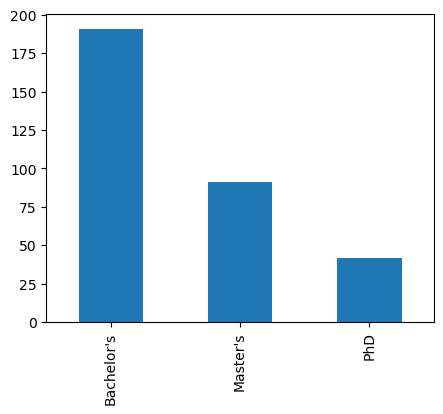

In [60]:
data_set1['Education Level'].value_counts().plot(kind="bar", figsize=(5, 4))


<Axes: >

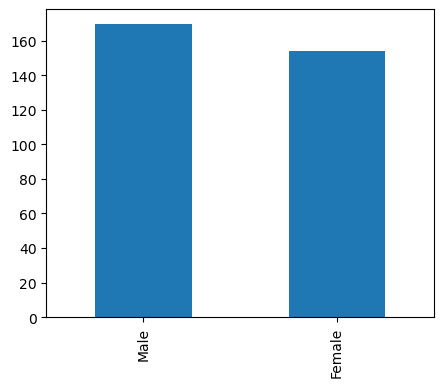

In [61]:
data_set1['Gender'].value_counts().plot(kind="bar", figsize=(5, 4))


<Axes: >

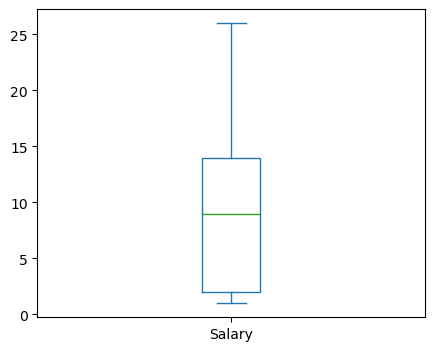

In [62]:
data_set1['Salary'].value_counts().plot(kind="box", figsize=(5, 4))

<Axes: >

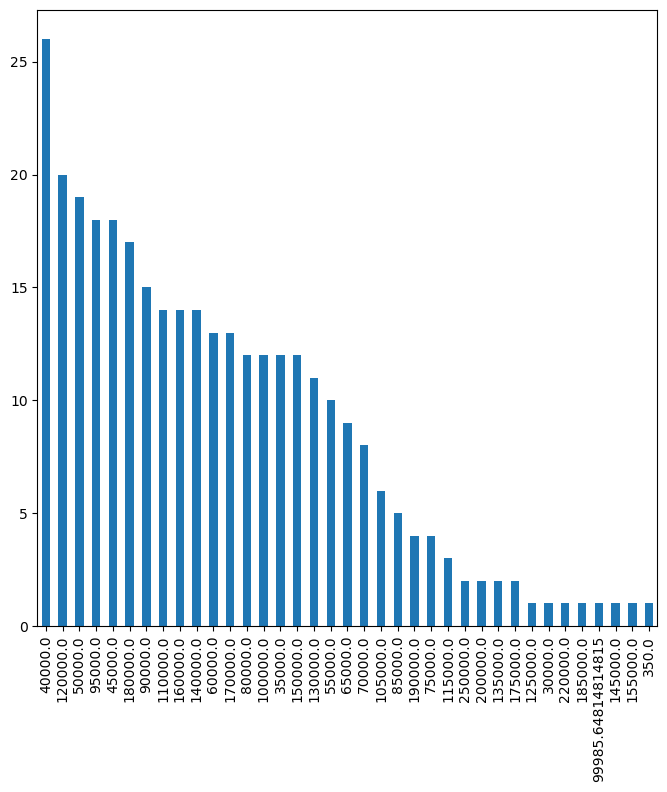

In [63]:
data_set1['Salary'].value_counts().plot(kind="bar", figsize=(8, 8))


In [64]:
data_set1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [65]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder=LabelEncoder()

data_set1["Gender"]=Label_Encoder.fit_transform(data_set1["Gender"])
data_set1["Education Level"]=Label_Encoder.fit_transform(data_set1["Education Level"])
data_set1["Job Title"]=Label_Encoder.fit_transform(data_set1["Job Title"])

data_set1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0


In [66]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_set1["Age"]=scaler.fit_transform(data_set1[["Age"]])
data_set1["Years of Experience"]=scaler.fit_transform(data_set1[["Years of Experience"]])
data_set1["Job Title"]=scaler.fit_transform(data_set1[["Job Title"]])

data_set1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,-0.751388,1,0,1.478511,-0.762996,90000.0
1,-1.309758,0,1,-1.530144,-1.064656,65000.0
2,1.063317,1,2,0.864067,0.745306,150000.0
3,-0.193017,0,0,0.249624,-0.461335,60000.0
4,2.040466,1,1,-1.424205,1.499456,200000.0


In [67]:
X=data_set1[["Age","Gender","Education Level","Job Title","Years of Experience"]]
y=data_set1[["Salary"]]

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y ,test_size=0.2,random_state=42)

In [69]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score ,r2_score

n_neighbors = [1, 3, 5, 6, 7, 9, 11]
r2_list = []

for n in n_neighbors:
    knn_regressor = KNeighborsRegressor(n_neighbors=n)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    r2_list.append(r2)

best_n = n_neighbors[r2_list.index(max(r2_list))]
best_r2 = max(r2_list)


In [70]:
print("Best n_neighbors:", best_n)
print("Best R2 Score is {0:.2f}% :". format( 100*best_r2))

Best n_neighbors: 3
Best R2 Score is 94.35% :


Text(0.5, 1.0, 'Predicted vs Actual Salary (KNN Regression)')

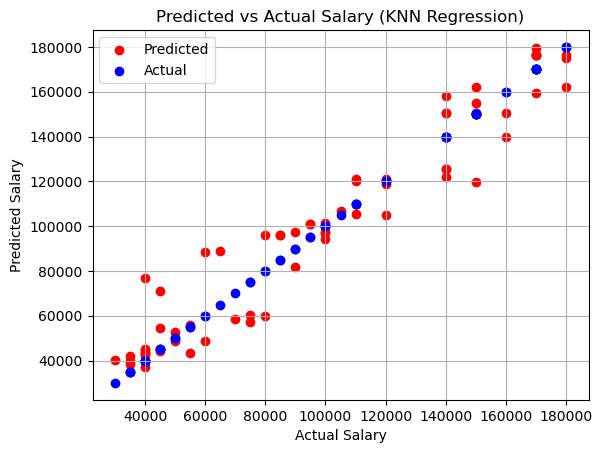

In [71]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, c='red', label='Predicted')
plt.scatter(y_test, y_test, c='blue', label='Actual')

plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.grid(True)
plt.legend()
plt.title('Predicted vs Actual Salary (KNN Regression)')
